In [2]:
import pandas as pd

log1 = pd.read_csv('checkpoints/Qwen2b-Robot-Arm-Unsloth/2B/V4/log.csv')
log1.index = log1['step']
log1 = log1.drop(columns=['step'])
log1

,loss,grad_norm,learning_rate,epoch,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
step,,,,,,,,,,,,,
10,2.0410,0.983779,0.000498,0.022701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.5227,0.943825,0.000494,0.045403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.3237,1.274211,0.000490,0.068104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.2732,1.074274,0.000487,0.090806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.2525,0.293317,0.000483,0.113507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,0.0987,0.142748,0.000008,2.948922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,NaN,2.948922,0.106158,219.4485,0.911,0.456,NaN,NaN,NaN,NaN,NaN
1310,0.1046,0.175932,0.000004,2.971623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_loss = log1.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()
train_loss

,loss,grad_norm,learning_rate
step,,,
10,2.0410,0.983779,0.000498
20,0.5227,0.943825,0.000494
30,0.3237,1.274211,0.000490
40,0.2732,1.074274,0.000487
50,0.2525,0.293317,0.000483
...,...,...,...
1280,0.1015,0.161840,0.000015
1290,0.1054,0.158332,0.000011
1300,0.0987,0.142748,0.000008


In [4]:
train_loss = log1.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()

val_loss = log1.groupby('step')[['eval_loss']].sum()
val_loss = val_loss[val_loss['eval_loss'] != 0]

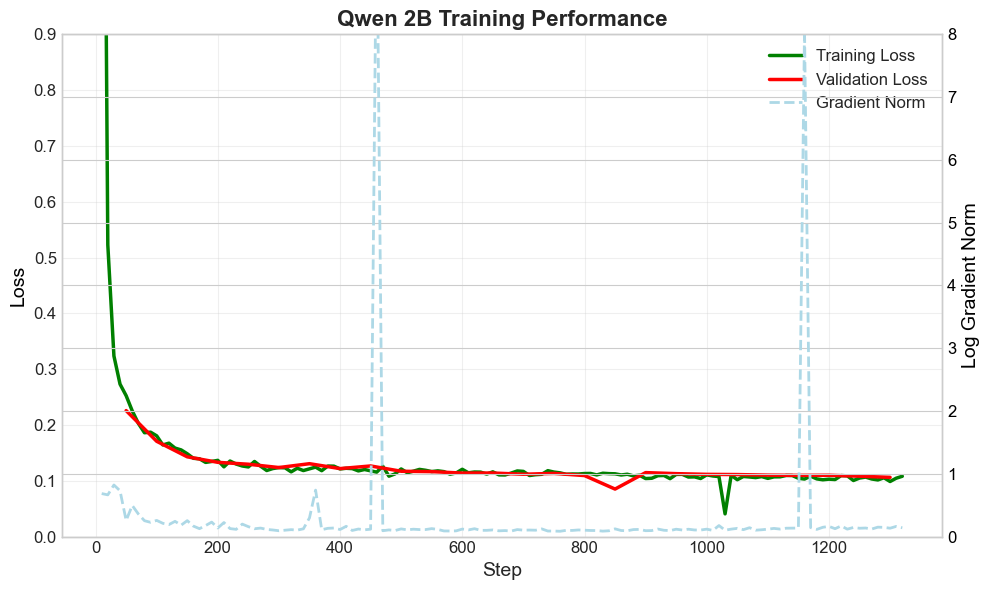

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))
y_min = 0
y_max = 0.9
# Plot Training and Validation Loss on the left y-axis
ax1.plot(train_loss.index, train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss.index, val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')

# Labeling for left y-axis
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14, color='black')
ax1.set_title('Qwen 2B Training Performance', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)

# Tick customization
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(train_loss.index, np.log(train_loss['grad_norm']+1), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')

# Label for the secondary axis
ax2.set_ylabel('Log Gradient Norm', fontsize=14, color='black')
ax2.set_ylim(0, 8)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')
fig.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np

log1 = pd.read_csv('checkpoints/Qwen2b-Robot-Arm-Unsloth/7B/V2/log1.csv')
log2 = pd.read_csv('checkpoints/Qwen2b-Robot-Arm-Unsloth/7B/V2/log2.csv')
log3 = pd.read_csv('checkpoints/Qwen2b-Robot-Arm-Unsloth/7B/V2/log3.csv')

log2['step'] = log2['step'] + 440
log3['step'] = log3['step'] + 880

In [7]:
log = pd.concat([log1, log2, log3], axis=0)
log.index = log['step']
log = log.drop(columns=['step'])
log

,loss,grad_norm,learning_rate,epoch,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
step,,,,,,,,,,,,,
10,2.4305,2.176629,0.000198,0.022708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.5784,0.566539,0.000193,0.045416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.3409,0.604775,0.000189,0.068124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.2681,0.418515,0.000184,0.090832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.2364,0.319472,0.000179,0.113540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0789,0.332963,0.000014,0.931025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,0.0808,0.243163,0.000009,0.953733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,0.0801,0.245308,0.000005,0.976441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_loss1 = log.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()

val_loss1 = log.groupby('step')[['eval_loss']].sum()
val_loss1 = val_loss[val_loss['eval_loss'] != 0]

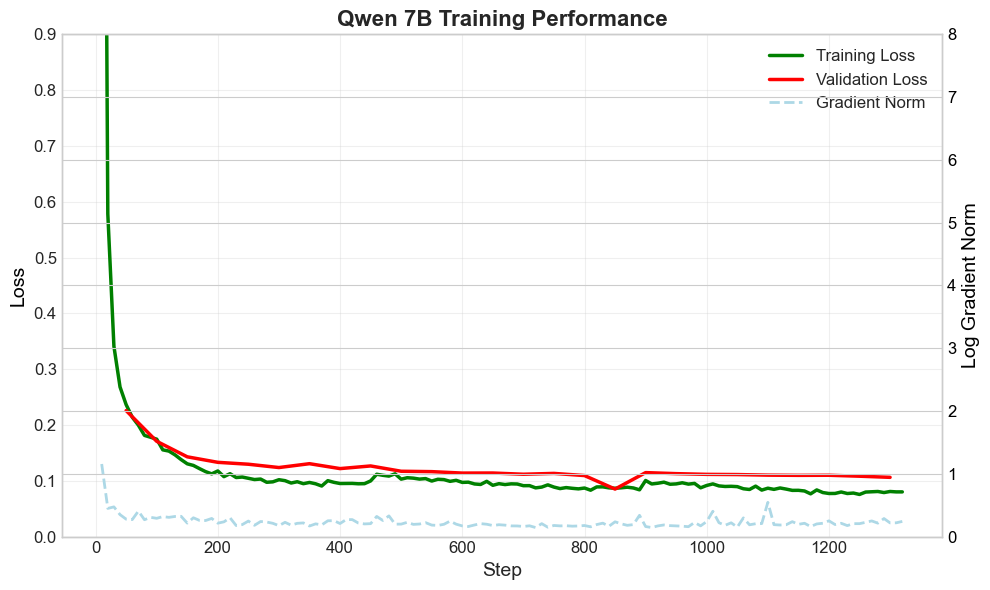

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))
y_min = 0
y_max = 0.9
# Plot Training and Validation Loss on the left y-axis
ax1.plot(train_loss1.index, train_loss1['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss1.index, val_loss1['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')

# Labeling for left y-axis
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14, color='black')
ax1.set_title('Qwen 7B Training Performance', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)

# Tick customization
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(train_loss1.index, np.log(train_loss1['grad_norm']+1), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')

# Label for the secondary axis
ax2.set_ylabel('Log Gradient Norm', fontsize=14, color='black')
ax2.set_ylim(0, 8)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')
fig.tight_layout()
plt.show()

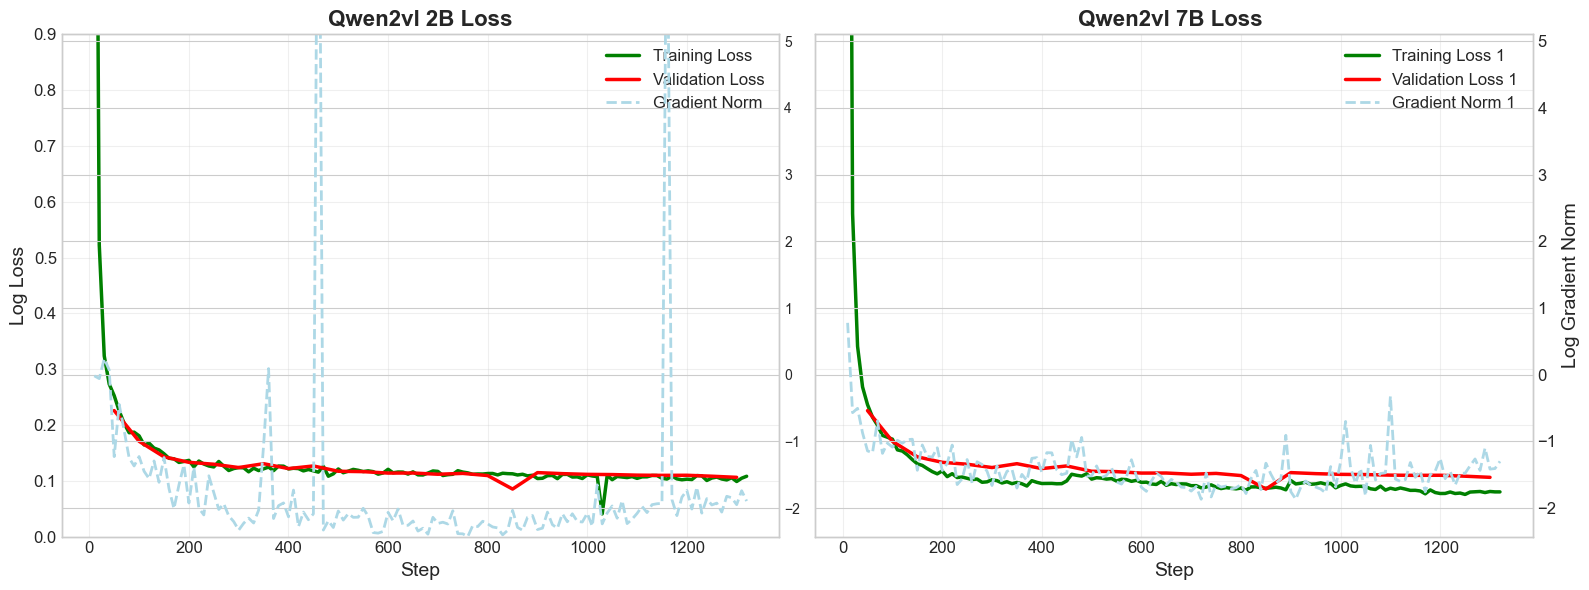

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

# Calculate shared y-axis limits
y_max = 0.9
y_min = 0

# Calculate gradient norm y-limits (for syncing right y-axis)
g_min = min(np.log(train_loss['grad_norm']).min(), np.log(train_loss1['grad_norm']).min())
g_max = 0.5*max(np.log(train_loss['grad_norm']).max(), np.log(train_loss1['grad_norm']).max())

# Create side-by-side plots with shared left y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---------- First Plot ----------
ax1.plot(train_loss.index, train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss.index, val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Log Loss', fontsize=14)
ax1.set_title('Qwen2vl 2B Loss', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)

# Right y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(train_loss.index, np.log(train_loss['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')
# ax1_twin.set_ylabel('Log Gradient Norm', fontsize=14)
# ax1_twin.tick_params(axis='y', labelsize=12)
ax1_twin.set_ylim(g_min, g_max)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='upper right')

# ---------- Second Plot ----------
ax2.plot(train_loss1.index, train_loss1['loss'], color='green', linewidth=2.5, label='Training Loss 1')
ax2.plot(val_loss1.index, val_loss1['eval_loss'], color='red', linewidth=2.5, label='Validation Loss 1')
ax2.set_xlabel('Step', fontsize=14)
ax2.set_title('Qwen2vl 7B Loss ', fontsize=16, fontweight='bold')
ax2.set_ylim(y_min, y_max)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(alpha=0.3)

# Right y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(train_loss1.index, np.log(train_loss1['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm 1')
ax2_twin.set_ylabel('Log Gradient Norm', fontsize=14)
ax2_twin.tick_params(axis='y', labelsize=12)
ax2_twin.set_ylim(g_min, g_max)

# Combine legends
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, fontsize=12, loc='upper right')

# Final layout
fig.tight_layout()
plt.show()



In [11]:
import json
import pandas as pd

file_path = "checkpoints/LlamaVision-Output/checkpoint-441/trainer_state.json"
with open(file_path, "r") as f:
    trainer_state = json.load(f)

log_history = trainer_state.get("log_history", [])
llama = pd.DataFrame(log_history)
llama.index = llama['step']
llama = llama.drop(columns=['step'])
llama

,epoch,grad_norm,learning_rate,loss,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
step,,,,,,,,
10,0.068027,1.366702,1.981651e-04,2.4897,NaN,NaN,NaN,NaN
20,0.136054,0.674198,1.935780e-04,0.8060,NaN,NaN,NaN,NaN
30,0.204082,0.451314,1.889908e-04,0.4975,NaN,NaN,NaN,NaN
40,0.272109,0.448541,1.844037e-04,0.4167,NaN,NaN,NaN,NaN
50,0.340136,0.286217,1.798165e-04,0.3702,NaN,NaN,NaN,NaN
50,0.340136,NaN,NaN,NaN,0.337513,368.7194,0.407,0.068
60,0.408163,0.327683,1.752294e-04,0.3157,NaN,NaN,NaN,NaN
70,0.476190,0.372092,1.706422e-04,0.2849,NaN,NaN,NaN,NaN
80,0.544218,0.525778,1.660550e-04,0.2681,NaN,NaN,NaN,NaN


In [12]:
llama_train_loss = llama.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()
llama_train_loss

,loss,grad_norm,learning_rate
step,,,
10,2.4897,1.366702,1.981651e-04
20,0.8060,0.674198,1.935780e-04
30,0.4975,0.451314,1.889908e-04
40,0.4167,0.448541,1.844037e-04
50,0.3702,0.286217,1.798165e-04
60,0.3157,0.327683,1.752294e-04
70,0.2849,0.372092,1.706422e-04
80,0.2681,0.525778,1.660550e-04
90,0.2522,0.362736,1.614679e-04


In [13]:
llama_val_loss = llama.groupby('step')[['eval_loss']].sum()
llama_val_loss = llama_val_loss[llama_val_loss['eval_loss'] != 0]
llama_val_loss

,eval_loss
step,
50,0.337513
100,0.238399
150,0.216303
200,0.206882
250,0.192718
300,0.185695
350,0.177726
400,0.171633


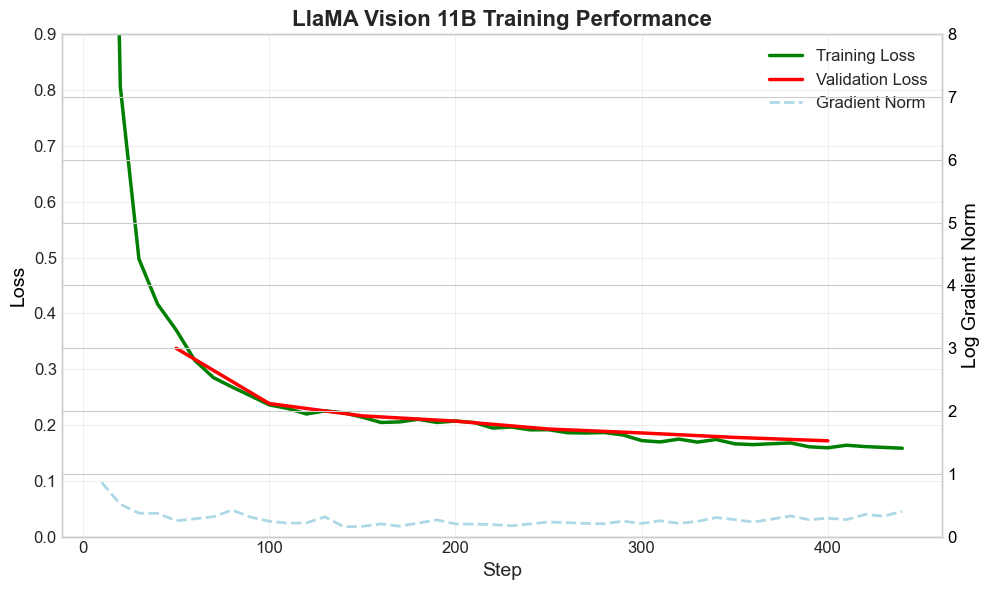

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))
y_min = 0
y_max = 0.9
# Plot Training and Validation Loss on the left y-axis
ax1.plot(llama_train_loss.index, llama_train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(llama_val_loss.index, llama_val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')

# Labeling for left y-axis
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14, color='black')
ax1.set_title('LlaMA Vision 11B Training Performance', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)

# Tick customization
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(llama_train_loss.index, np.log(llama_train_loss['grad_norm']+1), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')

# Label for the secondary axis
ax2.set_ylabel('Log Gradient Norm', fontsize=14, color='black')
ax2.set_ylim(0, 8)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')
fig.tight_layout()
plt.show()

In [15]:
file_path = "checkpoints/Llava-Output/checkpoint-300/trainer_state.json"
with open(file_path, "r") as f:
    trainer_state1 = json.load(f)
log1 = trainer_state1.get("log_history", [])
llava_log1 = pd.DataFrame(log1)

file_path = r"checkpoints\Llava-Output\V1-p2\checkpoint-147\trainer_state.json"
with open(file_path, "r") as f:
    trainer_state2 = json.load(f)
log2 = trainer_state2.get("log_history", [])
llava_log2 = pd.DataFrame(log2)
llava_log2['step'] = llava_log2['step'] + 300

llava_log = pd.concat([llava_log1, llava_log2], axis=0)
llava_log.index = llava_log['step']
llava_log = llava_log.drop(columns=['step'])

In [16]:
llava_log

,epoch,grad_norm,learning_rate,loss,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
step,,,,,,,,
10,0.068027,6.053496,0.000199,9.0865,NaN,NaN,NaN,NaN
20,0.136054,2.738230,0.000194,1.3547,NaN,NaN,NaN,NaN
30,0.204082,1.252311,0.000189,0.7815,NaN,NaN,NaN,NaN
40,0.272109,1.068308,0.000185,0.6487,NaN,NaN,NaN,NaN
50,0.340136,0.880705,0.000180,0.5453,NaN,NaN,NaN,NaN
50,0.340136,NaN,NaN,NaN,0.122129,248.6604,0.603,0.101
60,0.408163,1.157512,0.000176,0.4678,NaN,NaN,NaN,NaN
70,0.476190,0.974475,0.000171,0.4218,NaN,NaN,NaN,NaN
80,0.544218,0.772760,0.000167,0.4169,NaN,NaN,NaN,NaN


In [18]:
llava_train_loss = llava_log.groupby('step')[['loss', 'grad_norm', 'learning_rate']].sum()
llava_val_loss = llava_log.groupby('step')[['eval_loss']].sum()
llava_val_loss = llava_val_loss[llava_val_loss['eval_loss'] != 0]

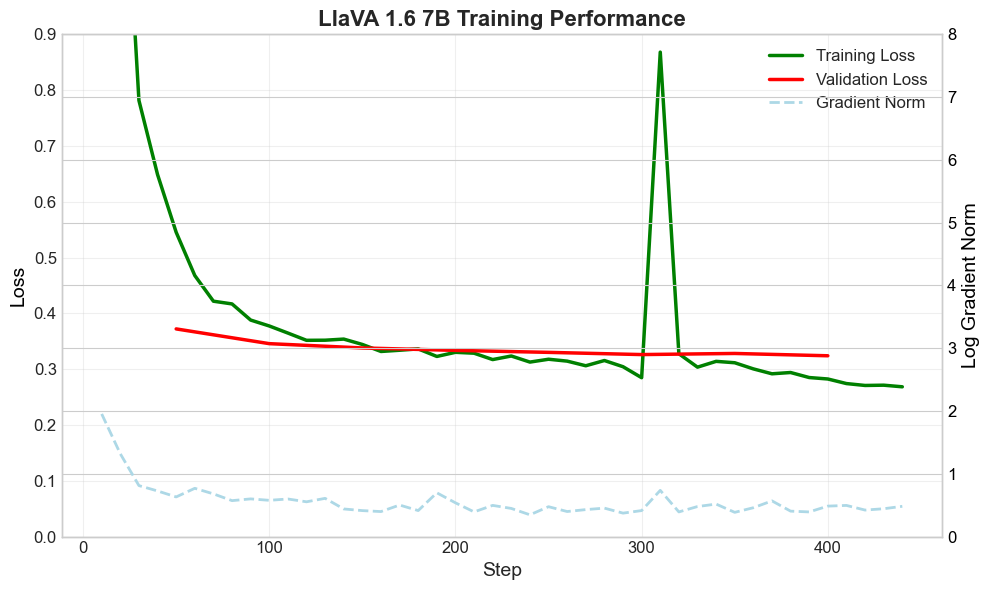

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))
y_min = 0
y_max = 0.9
# Plot Training and Validation Loss on the left y-axis
ax1.plot(llava_train_loss.index, llava_train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(llava_val_loss.index, llava_val_loss['eval_loss'] + 0.25, color='red', linewidth=2.5, label='Validation Loss')

# Labeling for left y-axis
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14, color='black')
ax1.set_title('LlaVA 1.6 7B Training Performance', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)

# Tick customization
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(llava_train_loss.index, np.log(llava_train_loss['grad_norm']+1), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')

# Label for the secondary axis
ax2.set_ylabel('Log Gradient Norm', fontsize=14, color='black')
ax2.set_ylim(0, 8)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')
fig.tight_layout()
plt.show()

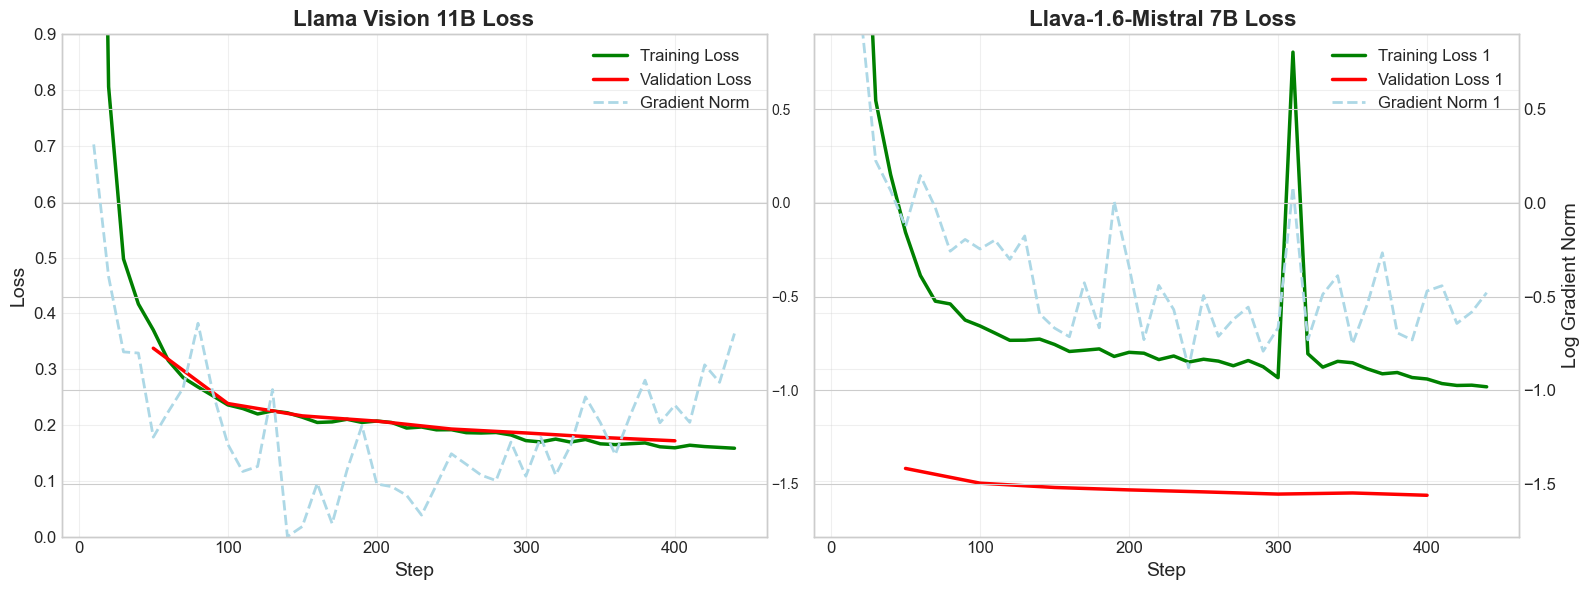

In [23]:
import matplotlib.pyplot as plt
import numpy as np

train_loss = llama_train_loss
train_loss1 = llava_train_loss
val_loss = llama_val_loss
val_loss1 = llava_val_loss


plt.style.use('seaborn-v0_8-whitegrid')

# Calculate shared y-axis limits
y_max = 0.9
y_min = 0

# Calculate gradient norm y-limits (for syncing right y-axis)
g_min = min(np.log(train_loss['grad_norm']).min(), np.log(train_loss1['grad_norm']).min())
g_max = 0.5*max(np.log(train_loss['grad_norm']).max(), np.log(train_loss1['grad_norm']).max())

# Create side-by-side plots with shared left y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---------- First Plot ----------
ax1.plot(train_loss.index, train_loss['loss'], color='green', linewidth=2.5, label='Training Loss')
ax1.plot(val_loss.index, val_loss['eval_loss'], color='red', linewidth=2.5, label='Validation Loss')
ax1.set_xlabel('Step', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Llama Vision 11B Loss', fontsize=16, fontweight='bold')
ax1.set_ylim(y_min, y_max)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(alpha=0.3)

# Right y-axis
ax1_twin = ax1.twinx()
ax1_twin.plot(train_loss.index, np.log(train_loss['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm')
# ax1_twin.set_ylabel('Gradient Norm', fontsize=14)
# ax1_twin.tick_params(axis='y', labelsize=12)
ax1_twin.set_ylim(g_min, g_max)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='upper right')

# ---------- Second Plot ----------
ax2.plot(train_loss1.index, train_loss1['loss'], color='green', linewidth=2.5, label='Training Loss 1')
ax2.plot(val_loss1.index, val_loss1['eval_loss'], color='red', linewidth=2.5, label='Validation Loss 1')
ax2.set_xlabel('Step', fontsize=14)
ax2.set_title('Llava-1.6-Mistral 7B Loss ', fontsize=16, fontweight='bold')
ax2.set_ylim(y_min, y_max)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(alpha=0.3)

# Right y-axis
ax2_twin = ax2.twinx()
ax2_twin.plot(train_loss1.index, np.log(train_loss1['grad_norm']), color='lightblue', linewidth=2, linestyle='--', label='Gradient Norm 1')
ax2_twin.set_ylabel('Log Gradient Norm', fontsize=14)
ax2_twin.tick_params(axis='y', labelsize=12)
ax2_twin.set_ylim(g_min, g_max)

# Combine legends
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, fontsize=12, loc='upper right')

# Final layout
fig.tight_layout()
plt.show()

In [32]:
y_min

0.1583